In [1]:
%load_ext nb_black
import sys

sys.path.append("/Users/vikaspandey/my_projects/deeplearning_ai")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [2]:
data = pd.read_csv("Data/realData/final_aqi_data.csv")

<IPython.core.display.Javascript object>

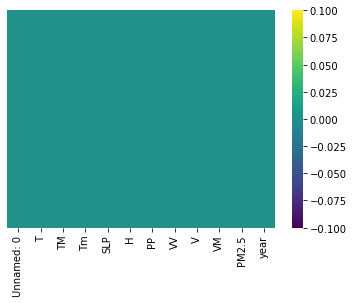

<IPython.core.display.Javascript object>

In [3]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap="viridis")

In [4]:
data.drop(["year", "Unnamed: 0"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [5]:
X = data.iloc[:, :-1]  ## Independent features
Y = data.iloc[:, -1]  ## dependent features

<IPython.core.display.Javascript object>

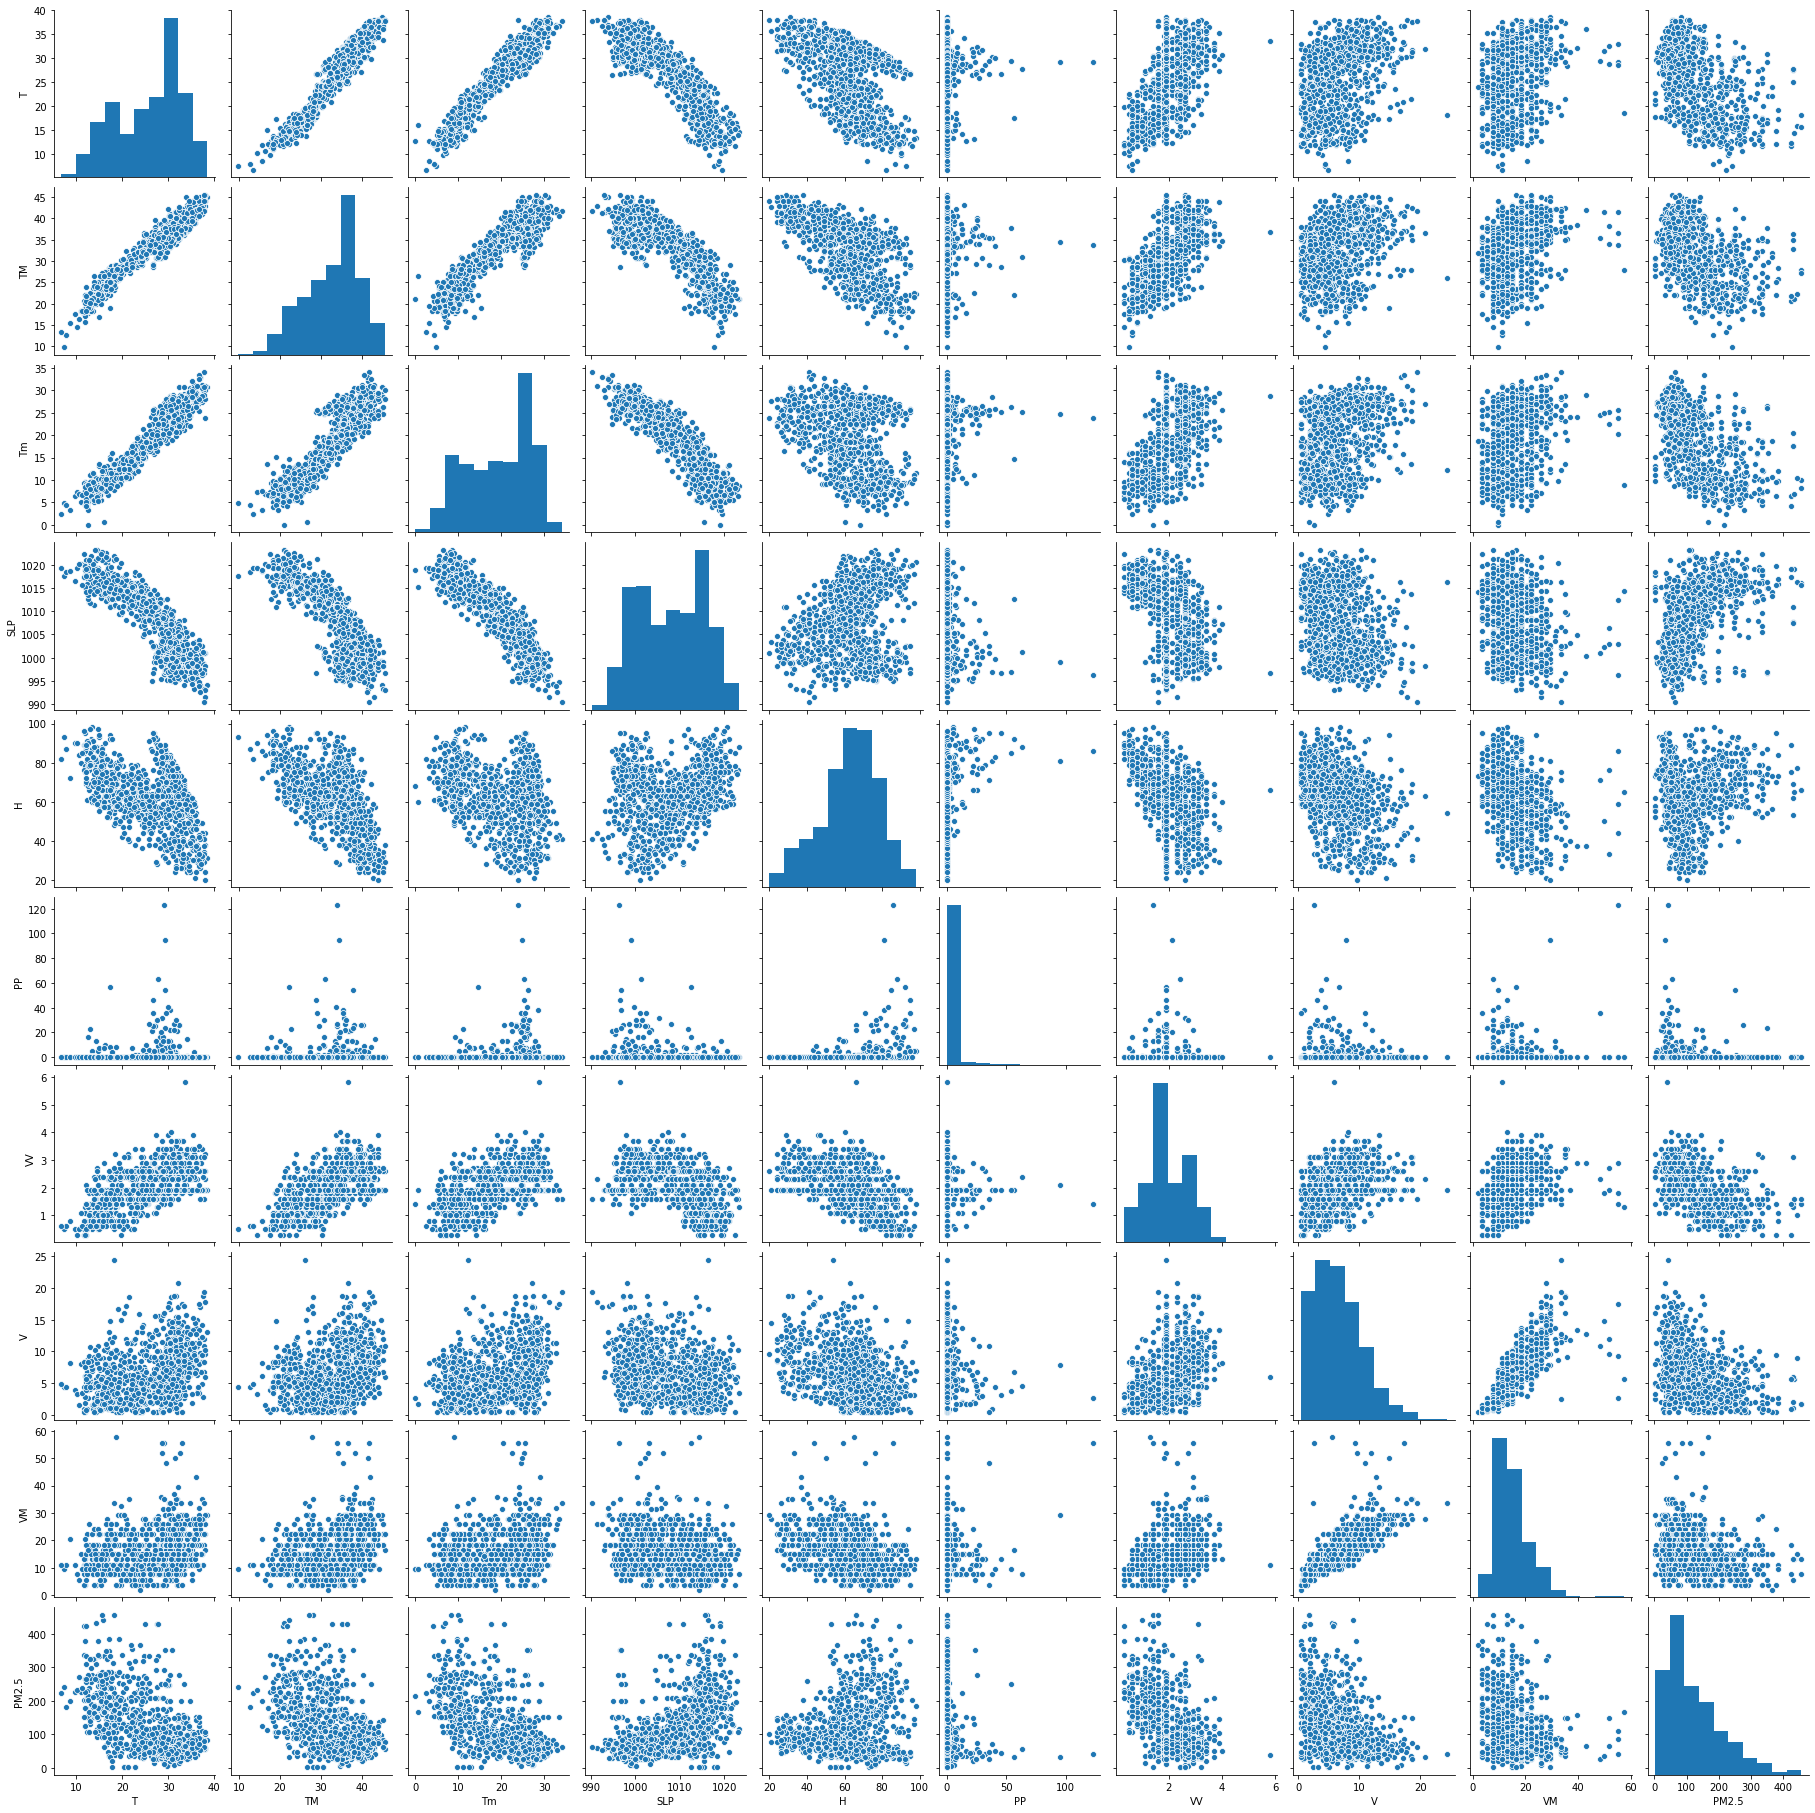

<IPython.core.display.Javascript object>

In [6]:
sns.pairplot(data)

In [7]:
data.corr()

,T,TM,Tm,SLP,H,PP,VV,V,VM,PM2.5
T,1.000000,0.963172,0.957200,-0.882107,-0.499675,0.049206,0.603449,0.323238,0.273345,-0.570910
TM,0.963172,1.000000,0.888981,-0.823161,-0.591083,0.018709,0.573947,0.302595,0.279116,-0.506681
Tm,0.957200,0.888981,1.000000,-0.910058,-0.288707,0.109973,0.521393,0.316897,0.239888,-0.600325
SLP,-0.882107,-0.823161,-0.910058,1.000000,0.249027,-0.177518,-0.452729,-0.332611,-0.267330,0.572961
H,-0.499675,-0.591083,-0.288707,0.249027,1.000000,0.252454,-0.496663,-0.359481,-0.379868,0.178369
PP,0.049206,0.018709,0.109973,-0.177518,0.252454,1.000000,-0.031707,-0.055451,0.071488,-0.118518
VV,0.603449,0.573947,0.521393,-0.452729,-0.496663,-0.031707,1.000000,0.373573,0.327808,-0.472307
V,0.323238,0.302595,0.316897,-0.332611,-0.359481,-0.055451,0.373573,1.000000,0.783022,-0.346547
VM,0.273345,0.279116,0.239888,-0.267330,-0.379868,0.071488,0.327808,0.783022,1.000000,-0.261257
PM2.5,-0.570910,-0.506681,-0.600325,0.572961,0.178369,-0.118518,-0.472307,-0.346547,-0.261257,1.000000


<IPython.core.display.Javascript object>

#### Correlation Matrix With Heatmap
Correlation states that how features are related with each other or the target variable. Correlation can be positive or negative.

Heatmap makes it easy to identify which features are most related to the target variable. The heatmap of correlated features can be plotted using seaborn lib.

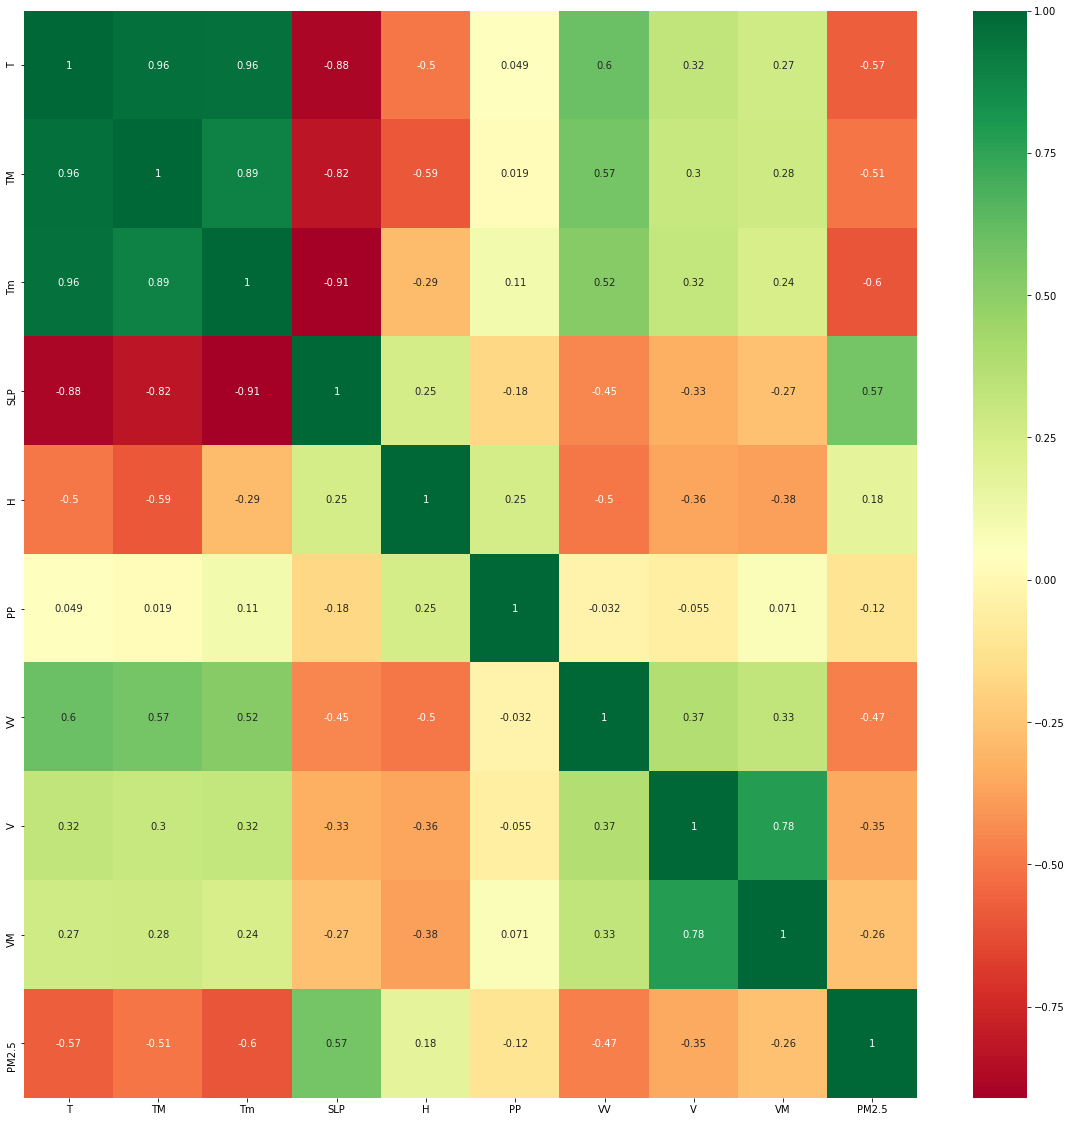

<IPython.core.display.Javascript object>

In [8]:
import seaborn as sns

corrmat = data.corr()
plt.figure(figsize=(20, 20))
# data[corrmat.index].corr()
g = sns.heatmap(data[corrmat.index].corr(), annot=True, cmap="RdYlGn")

#### Feature Impotance
You can get the feature importance of each feature of the dataset by using feature importance property of the model. Feature importance gives us a score for each feature in the data, the higher the score more important or relevant is the feature towards your output variable.

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

model = ExtraTreesRegressor()
model.fit(X, Y)

ExtraTreesRegressor()

<IPython.core.display.Javascript object>

In [10]:
model.feature_importances_

array([0.11913481, 0.08681531, 0.20787913, 0.18895832, 0.07570463,
       0.02134052, 0.15747401, 0.08027364, 0.06241964])

<IPython.core.display.Javascript object>

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

<IPython.core.display.Javascript object>

In [12]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [13]:
regressor.score(X_train, y_train)

0.46295790426083594

<IPython.core.display.Javascript object>

In [14]:
regressor.score(X_test, y_test)

0.3152531561350884

<IPython.core.display.Javascript object>

In [15]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(regressor, X, Y, cv=5)

<IPython.core.display.Javascript object>

In [16]:
score.mean()

0.3578228385660306

<IPython.core.display.Javascript object>

In [17]:
# plot graph of feature importance for better visualisation
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

<IPython.core.display.Javascript object>

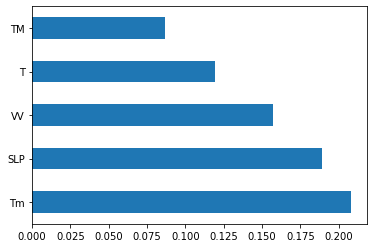

<IPython.core.display.Javascript object>

In [18]:
feat_importances.nlargest(5).plot(kind="barh")
plt.show()

### Linear Regression

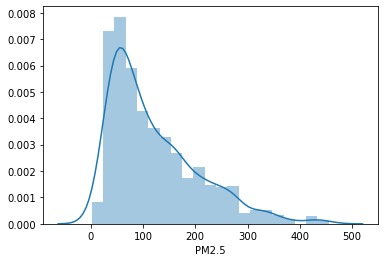

<IPython.core.display.Javascript object>

In [19]:
sns.distplot(Y)

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

<IPython.core.display.Javascript object>

In [21]:
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>

In [22]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

### R^2 Score

In [23]:
regressor.score(X_train, y_train)

0.46295790426083594

<IPython.core.display.Javascript object>

In [24]:
regressor.score(X_test, y_test)

0.3152531561350884

<IPython.core.display.Javascript object>

In [25]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(regressor, X, Y, scoring="neg_mean_squared_error", cv=5)

<IPython.core.display.Javascript object>

In [26]:
score.mean()

-4588.145386558263

<IPython.core.display.Javascript object>

In [27]:
regressor.coef_

array([ -0.15103537,   3.95183663,  -6.1727102 ,   2.19197306,
        -0.04299735,  -0.54642754, -30.53827083,  -2.97811435,
         0.13006383])

<IPython.core.display.Javascript object>

In [28]:
regressor.intercept_

-2009.4217126245985

<IPython.core.display.Javascript object>

In [29]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=["Coefficient"])

<IPython.core.display.Javascript object>

In [30]:
coeff_df.head()

,Coefficient
T,-0.151035
TM,3.951837
Tm,-6.172710
SLP,2.191973
H,-0.042997


<IPython.core.display.Javascript object>

#### Interpreting the coefficients:
- The value -0.151035 for T means, holding all other features fixed, a 1 unit increase in T is asssociated with a "decrease of 0.151035 in AQI PM2.5"
 

In [31]:
prediction = regressor.predict(X_test)

<IPython.core.display.Javascript object>

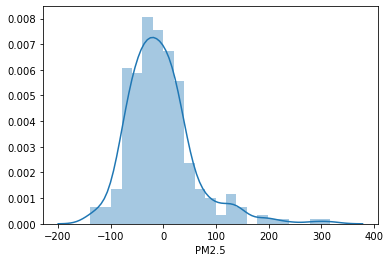

<IPython.core.display.Javascript object>

In [32]:
sns.distplot(y_test - prediction)

### Regression Evaluation Matrics
Here are three common evaluation metrics for regression problems

- __Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors

- __Mean Squared Error__ (MSE) is the mean of the squared errors

- __Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors

In [33]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, prediction)
metrics.mean_squared_error(y_test, prediction)
np.sqrt(metrics.mean_squared_error(y_test, prediction))

63.709310392711856

<IPython.core.display.Javascript object>

In [34]:
import pickle

<IPython.core.display.Javascript object>

In [35]:
file = open("regression.pkl", "wb")
pickle.dump(regressor, file)

<IPython.core.display.Javascript object>

### Ridge and Lasso Regression

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [37]:
ridge = Ridge()
parameters = {"alpha": [1e-15, 1e-10, 1e-8, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(
    ridge, parameters, scoring="neg_mean_squared_error", cv=5
)
ridge_regressor.fit(X, Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-08, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

<IPython.core.display.Javascript object>

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

### Lasso Regression

In [38]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [39]:
lasso = Lasso()
parameters = {"alpha": [1e-15, 1e-10, 1e-8, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(
    ridge, parameters, scoring="neg_mean_squared_error", cv=5
)
lasso_regressor.fit(X, Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-08, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

<IPython.core.display.Javascript object>

In [40]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-4551.561446026346


<IPython.core.display.Javascript object>

### XGBoost Regressor

In [41]:
from algorithms.regression.xg_boost_regressor import XGBoostRegressor

<IPython.core.display.Javascript object>

In [42]:
xgb = XGBoostRegressor(X_train, y_train)
xgb.n_estimators = [int(x) for x in np.linspace(100, 1200, num=12)]
xgb.learning_rate = ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6']
xgb.max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
xgb.subsample = [0.7, 0.6, 0.8]
xgb.min_child_weight = [3,4,5,6,7]
xgb.fit()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, score=-4588.140, total=   0.5s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, score=-4921.718, total=   1.1s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, score=-5533.791, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, score=-6465.815, total=   1.0s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, score=-5409.687, total=   0.9s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, score=-4963.296, total=   1.0s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, score=-5144.660, total=   1.0s
[CV] subsample=0

[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, score=-4978.783, total=   0.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, score=-5038.295, total=   0.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, score=-5701.308, total=   0.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, score=-5160.670, total=   0.5s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, score=-4723.047, total=   0.4s
[CV] subsample=0.7, n

[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, score=-4477.801, total=   0.5s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, score=-4687.098, total=   0.5s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, score=-4705.252, total=   0.5s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, score=-5659.144, total=   0.7s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, score=-4970.518, total=   0.6s
[CV] subsample=0.8, n

[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, score=-4906.661, total=   1.0s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, score=-4726.729, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, score=-6072.545, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, score=-5612.665, total=   0.2s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, score=-5488.511, total=   0.3s
[CV] subsample=0.7, n

[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, score=-5249.104, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, score=-4824.865, total=   0.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, score=-4464.610, total=   0.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, score=-4194.388, total=   0.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, score=-4607.538, total=   0.2s
[CV] subsample=

[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, score=-5617.111, total=   0.3s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, score=-6755.574, total=   0.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, score=-7662.090, total=   0.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, score=-5759.152, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, score=-4829.052, total=   0.5s
[CV] subsample=0.8, n

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, score=-4354.676, total=   1.2s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, score=-4540.274, total=   1.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, score=-5023.119, total=   1.2s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, score=-4815.182, total=   1.2s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, score=-4244.500, total=   0.6s
[CV] subsamp

[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, score=-4452.458, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, score=-5011.620, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, score=-6337.114, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, score=-6530.435, total=   0.1s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, score=-4219.853, total=   0.7s
[CV] subsample=0.7, n

[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, score=-4132.417, total=   0.6s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, score=-4277.127, total=   0.7s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, score=-4846.097, total=   2.0s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, score=-5098.385, total=   0.8s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, score=-4469.512, total=   0.8s
[CV] subsamp

[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, score=-5302.893, total=   0.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, score=-4583.700, total=   0.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, score=-4551.339, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, score=-4766.350, total=   0.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, score=-5920.877, total=  11.1s
[CV] subsample=0.7, n

[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, score=-4420.576, total=   0.2s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, score=-4500.344, total=   0.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, score=-4159.020, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, score=-4922.063, total=   0.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, score=-5331.850, total=   0.4s
[CV] subsample=0.7, 

[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, score=-5767.076, total=   0.0s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, score=-5605.543, total=   0.0s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, score=-5804.128, total=   0.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, score=-5239.273, total=   0.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, score=-5868.249, total=   0.3s
[CV] subsample=0.8, n_es

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, score=-4504.060, total=   1.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, score=-5287.819, total=   4.9s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, score=-4620.260, total=   4.6s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, score=-5572.674, total=   0.4s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, score=-6124.501, total=   0.9s
[CV] subsample=0

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.9min finished


In [43]:
xgb._best_params

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 15,
 'learning_rate': '0.05'}

<IPython.core.display.Javascript object>

In [44]:
xgb._best_score

-4320.471294351509

<IPython.core.display.Javascript object>

In [45]:
predictions = xgb.predict(X_test)

<IPython.core.display.Javascript object>

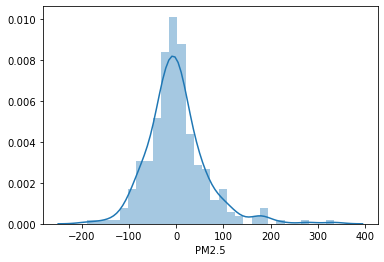

<IPython.core.display.Javascript object>

In [46]:
sns.distplot(y_test - predictions)

In [47]:
XGBoostRegressor.get_metrics(y_test, predictions)

{'MAE': 43.98951414903005,
 'MSE': 3966.505869222417,
 'RMSE': 62.980202200552014}

<IPython.core.display.Javascript object>